In [124]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,n_features = 2, centers=4, random_state=32, cluster_std=1.5)

import pandas as pd

df = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"Y":y})
df.head(5)

,X1,X2,Y
0,8.362801,-1.411925,0
1,7.167865,-1.037636,0
2,-10.683035,7.443676,3
3,10.362519,-0.627126,0
4,3.621164,-3.454718,0


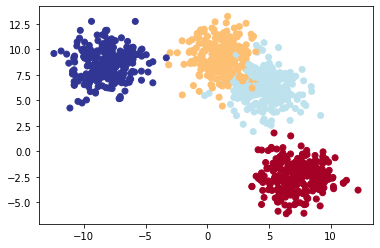

In [126]:
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.RdYlBu)

In [127]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [128]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32).unsqueeze(dim = 1)
split_percentage = int(0.8*len(X))
X_train , y_train = X[:split_percentage], y[:split_percentage]
X_test,y_test = X[split_percentage:], y[split_percentage:]

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print(y_train.shape)

torch.Size([800, 1])


In [129]:
class blob_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=2,out_features=20)
        self.linear_layer2 = nn.Linear(in_features=20,out_features=15)
        self.linear_layer4 = nn.Linear(in_features=15,out_features=10)
        self.linear_layer3 = nn.Linear(in_features=10,out_features=4)
        self.relu = nn.ReLU()
        
    def  forward(self,x : torch.tensor) -> torch.Tensor:
        return self.linear_layer3(self.relu(self.linear_layer4(self.relu(self.linear_layer2(self.relu(self.linear_layer1(x)))))))

In [130]:
model = blob_model()
model.state_dict()

OrderedDict([('linear_layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230]])),
             ('linear_layer1.bias',
              tensor([ 0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082

In [140]:
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model.parameters(),lr = 0.01)

In [141]:
def accuracy_fn(y_pred, y_true):
   correct = torch.eq(y_true,y_pred).sum().item()
   acc = (correct/len(y_pred)) * 100
   return acc

In [143]:
with torch.inference_mode():
        y_logits_test = model(X_test)
        print(y_logits_test[:5])
        yy1 = torch.max(y_logits_test,dim = 1 )
        print(yy1[1])
        
        y_preds2 = torch.argmax(torch.softmax(y_logits_test,dim =0 ),dim = 1)
        print(y_preds2[:5])
        loss2 = loss(y_logits_test,y_test)

tensor([[-0.1667,  0.0847,  0.6197, -0.6622],
        [-0.0163, -0.0763,  0.3195, -0.3347],
        [-0.0826, -0.0523,  0.2705, -0.2738],
        [-0.1538,  0.0482,  0.3872, -0.4385],
        [-0.2336,  0.1437,  0.5776, -0.6492]])
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])
tensor([2, 3, 3, 3, 1])


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [ ]:
torch.manual_seed(42)
epochs  = 100
epoch_set = []
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
    yy = torch.max(y_preds,dim = 1)
    print(len(yy))
    
    

  
    y_preds1 = torch.argmax(torch.softmax(y_preds,dim = 0),dim = 1)
    loss1 = loss(yy.unsqueeze(dim = 1).type(torch.float32),y_train)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    model.eval()
    epoch_set.append(epoch)
    train_loss.append(loss1.item())
    train_acc = accuracy_fn(y_preds1,y_train)
    train_accuracy.append(train_acc)
    with torch.inference_mode():
        y_logits_test = model(X_test)
        yy1 = torch.max(y_logits_test,dim = 1)
        
        y_preds2 = torch.argmax(torch.softmax(y_logits_test,dim =0 ),dim = 1)
        loss2 = loss(yy1.unsqueeze(dim = 1),y_test)
        test_loss.append(loss2.item())
        test_acc = accuracy_fn(y_preds2,y_test)
        test_accuracy.append(test_acc)
    print("Epoch: {}, Train Loss: {}, Train acc: {} , Test Loss: {} , Test acc: {}".format(epoch,loss1.item(),train_acc,loss2.item(),test_acc))
    
    
    
    

2


AttributeError: 'torch.return_types.max' object has no attribute 'unsqueeze'